# Bank Marketing dataset

The data is related with marketing campaigns of a Portuguese banking institution that were based on phone calls. The dataset contain several attributes such as bank clients data, information about current campaign and social and economic context attributes. The classification goal is to predict whether the client will subscribe a bank term deposit.  

In [25]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Setting plotting parameters
parameters = {'figure.figsize':(10, 7),
             'axes.labelsize': 11,
             'axes.titlesize':16}
plt.rcParams.update(parameters)
sns.set_style('darkgrid')

In [27]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


There are 41.188 observations and 21 variables in data including the target variable y.

### Variables description

#### Bank client data:
1. age

2. job : type of job

3. marital : marital status

4. education

5. default: has credit in default?

6. housing: has housing loan? 

7. loan: has personal loan? 

#### Related with the last contact of the current campaign:
8. contact: contact communication type

9. month: last contact month of year

10. day_of_week: last contact day of the week

11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other attributes:
12. campaign: number of contacts performed during this campaign and for this client

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

14. previous: number of contacts performed before this campaign and for this client

15. poutcome: outcome of the previous marketing campaign

#### Social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator

17. cons.price.idx: consumer price index - monthly indicator 

18. cons.conf.idx: consumer confidence index - monthly indicator 

19. euribor3m: euribor 3 month rate - daily indicator 
   - it is calculated by eliminating the highest 15% and the lowest 15% of the interest rates submitted and calculating the
     arithmetic mean of the remaining values

20. nr.employed: number of employees - quarterly indicator 

#### Target variable:
21. y - has the client subscribed a term deposit? 

In [28]:
# Descriptive statistics for numeric data
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The contacted clients were 40 years old in average. The average duration of communication is approximately 258 seconds (4 minutes, 3 seconds). The maximum value is 4918 seconds that could be an outlier (almost 82 minutes long communication). As we saw in the description of varaibles, duration variable is highly correlated with the target, so in case of prediting outcomes, we should exclude it. Variable campaign holds the number of contacts performed during this campaign. 75% of clients were contacted 3 times or less, and maximum value of contacts with a client is 56 times. Seems like the employees of the bank have tried to contact the client several times until they get the response. Variable pdays describe the number of day that passed by after the last contact with the client regarding previous campaign. 75% clients were not contacted in the previous campaign (999 = no previous contact). The similar result is for variable previous, that the majority of clients was not contacted. 

Variable emp.var.rate is indicator of employment rate calculated every quarter. The employment rate measures the number of employed people by the total labor force and can be calculated for cities, counties, states and countries. The average employment rate is 0.08%.

Variable cons.price.idx means consumer price index (aka CPI) which is economic indicator. It is used to measure the average changes in prices over period of time, that households pay for a basket of goods and services. Most CPI index series use 1982-1984 as the basis for comparison. [The U.S. Bureau of Labor Statistics (BLS)](https://www.bls.gov/) set the index level during this period at 100. In our dataset, the maximum CPI is approximately 94%, which means that there has been 6% decrease in the price of the market basket compared to the period of years 1982-1984.

Variable cons.conf.idx means consumer confidence index (aka CCI) which is a survey performed by monthly base. [This survey](https://tradingeconomics.com/portugal/consumer-confidence) is based on interviews with consumers about their perceptions of the current and future economic situation in the country and their tendencies to purchase. The relative value is separately computed for each question in this survey (for each question, positive responses are divided by the sum of positive and negative responses). These relative values are then compared against relative values from benchmark year 1985 ([CCI](https://en.wikipedia.org/wiki/Consumer_confidence_index)). The lowest CCI is of value -50%.


In [29]:
# Descriptive statistics for categorical variables
data.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


From the above statistics we can see that the majority of clients work in the administrative field and have university degree. Also the most of clients are married and have borrowed money for financing their houses. The most common day of the week and month when the contact with a client was performed is Thursday and May, respectively. The majority of contacted clients have not subscribed a term deposit.

In [30]:
# Renaming columns
data.rename(columns = {'marital':'marital_status','default':'default_credit','housing':'house_loan',
                      'contact':'contact_type','duration':'contact_duration','campaign':'number_of_contacts',
                      'pdays':'days_passed','previous':'number_previous_contact','poutcome':'previous_campaign_outcome',
                      'emp.var.rate':'emp_variation_rate','cons.price.idx':'CPI','cons.conf.idx':
                      'CCI','euribor3m':'euribor_rate','nr.employed':'no_employees','y':'target'},
           inplace = True)

In [31]:
# Checking for missing values
data.isnull().sum()

age                          0
job                          0
marital_status               0
education                    0
default_credit               0
house_loan                   0
loan                         0
contact_type                 0
month                        0
day_of_week                  0
contact_duration             0
number_of_contacts           0
days_passed                  0
number_previous_contact      0
previous_campaign_outcome    0
emp_variation_rate           0
CPI                          0
CCI                          0
euribor_rate                 0
no_employees                 0
target                       0
dtype: int64

There are no missing values stored as NaN in the dataset. However, there still could be hidden missing values that we are not able to see right now. 

In [32]:
# Finding duplicate rows
duplicated_rows = data[data.duplicated()]
duplicated_rows

,age,job,marital_status,education,default_credit,house_loan,loan,contact_type,month,day_of_week,...,number_of_contacts,days_passed,number_previous_contact,previous_campaign_outcome,emp_variation_rate,CPI,CCI,euribor_rate,no_employees,target
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


Here we can see all duplicate rows except their first occurence. These rows will be removed from the dataset.

In [33]:
# Removing duplicate rows
data.drop_duplicates(inplace = True)

In [34]:
# Checking whether the duplicate rows were correctly removed
data.duplicated().sum()

0

In [35]:
# Exploring data types
data.dtypes

age                            int64
job                           object
marital_status                object
education                     object
default_credit                object
house_loan                    object
loan                          object
contact_type                  object
month                         object
day_of_week                   object
contact_duration               int64
number_of_contacts             int64
days_passed                    int64
number_previous_contact        int64
previous_campaign_outcome     object
emp_variation_rate           float64
CPI                          float64
CCI                          float64
euribor_rate                 float64
no_employees                 float64
target                        object
dtype: object

In [41]:
# Converting data type
data.job = data.job.astype('category')
data.marital_status = data.marital_status.astype('category')
data.education = data.education.astype('category')
data.default_credit = data.default_credit.astype('category')
data.house_loan = data.house_loan.astype('category')
data.loan = data.loan.astype('category')
data.contact_type = data.contact_type.astype('category')
data.previous_campaign_outcome = data.previous_campaign_outcome.astype('category')
data.target = data.target.astype('category')

In [43]:
# Data types of variables
data.dtypes

age                             int64
job                          category
marital_status               category
education                    category
default_credit               category
house_loan                   category
loan                         category
contact_type                 category
month                          object
day_of_week                    object
contact_duration                int64
number_of_contacts              int64
days_passed                     int64
number_previous_contact         int64
previous_campaign_outcome    category
emp_variation_rate            float64
CPI                           float64
CCI                           float64
euribor_rate                  float64
no_employees                  float64
target                       category
dtype: object

# Exploring categorical variables


In [99]:
# Function to create a countplot
def create_countplot(x,order, **kwargs):
    title = kwargs.pop('title')
    xlabel = kwargs.pop('xlabel')
    ylabel = kwargs.pop('ylabel')
    plt.figure()
    sns.countplot(x, order = x.value_counts(ascending = False).index, **kwargs)
    plt.xticks(rotation = 45)
    fig = plt.gcf()
    for axis in fig.axes:
        axis.set_title(title)
        axis.xaxis.set_label_text(xlabel)
        axis.yaxis.set_label_text(ylabel)
    return axis

In [65]:
# Unique values of job variable
data.job.value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

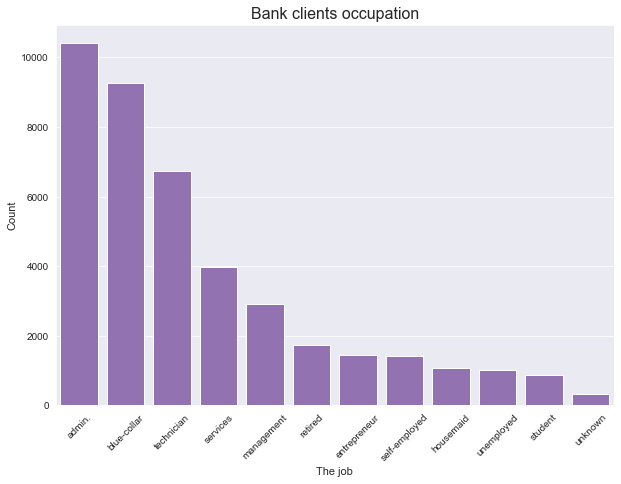

In [100]:
# Clients jobs visualization
labels = {'title':'Bank clients occupation','xlabel':'The job','ylabel':'Count'}
create_countplot(data.job, order = data.job, color = base_color, **labels);

The majority of bank clients work in administrative field and are 'blue-collar' workers who perform manual labor. The third common occupation is technician. The similar counts have clients who are entrepeneurs and self-employed people. We do not have job information for 330 bank clients.

In [68]:
# Unique values of marital status
data.marital_status.value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital_status, dtype: int64

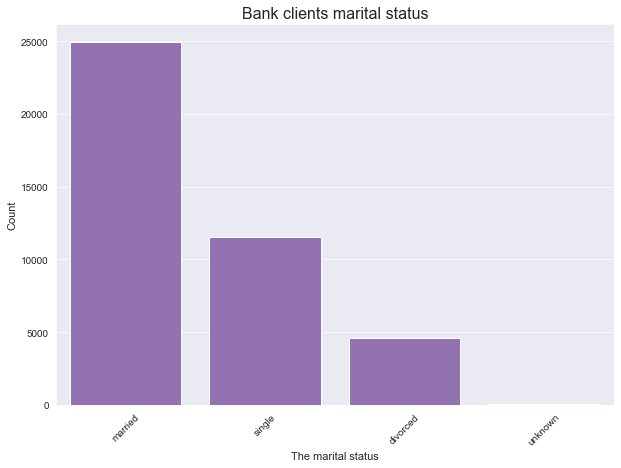

In [101]:
# Clients marital status visualization
labels = {'title':'Bank clients marital status','xlabel':'The marital status','ylabel':'Count'}
create_countplot(data.marital_status, order = data.marital_status, color = base_color, **labels);

There are 4 categories in marital_status variable: unknown, married, single and divorced (where divorced category means divorced or widowed). Most of the clients are married and we do not know marital status of 80 clients.

In [70]:
# Unique values of education of bank clients
data.education.value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

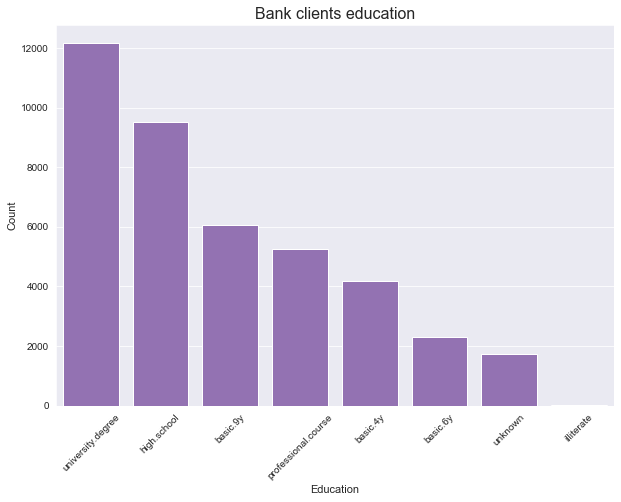

In [102]:
# Clients education visualization
labels = {'title':'Bank clients education','xlabel':'Education','ylabel':'Count'}
create_countplot(data.education, order = data.education, color = base_color, **labels);

The majority of clients have university degree followed by high school education. There are 3 categories of basic school education. More than 5000 clients have stated profeccional course as an education. Again we missed education records for 1730 clients. 

In [98]:
# Unique categories for default_credit variable
data.default_credit.value_counts()

no         32577
unknown     8596
yes            3
Name: default_credit, dtype: int64

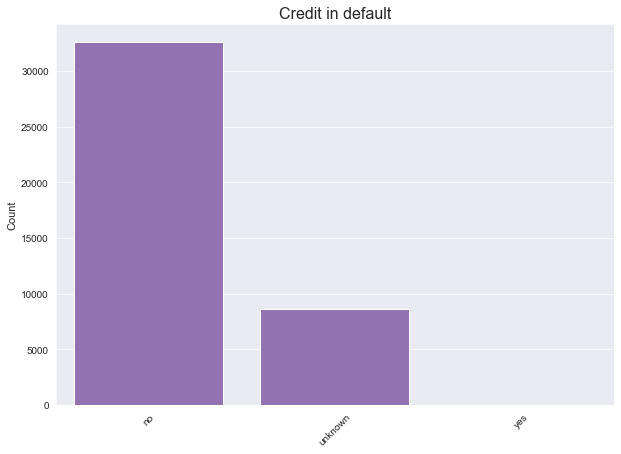

In [104]:
# Default credit visualization
labels = {'title':'Credit in default','xlabel':'','ylabel':'Count'}
create_countplot(data.default_credit, order = data.default_credit, color = base_color, **labels);

Only 3 clients have failed to repay the debt on the time. For 8596 clients we do not have information.

In [105]:
# Unique values of house_loan variable
data.house_loan.value_counts()

yes        21571
no         18615
unknown      990
Name: house_loan, dtype: int64

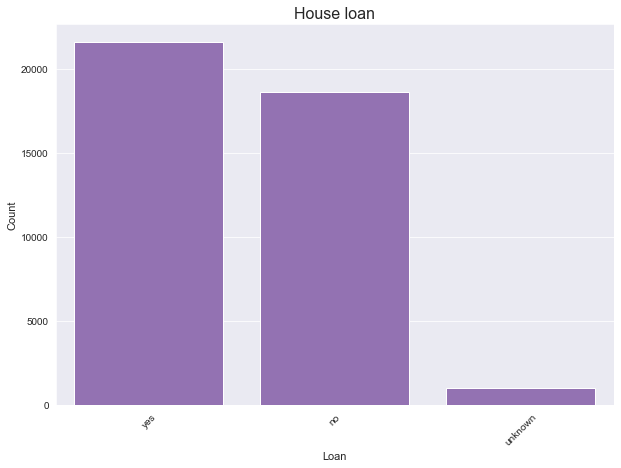

In [128]:
# House loan visualization
labels = {'title':'House loan','xlabel':'Loan','ylabel':'Count'}
create_countplot(data.house_loan, order = data.house_loan, color = base_color, **labels);

More than 20.000 of contacted clients have housing loan, and 990 clients did not share this information.

In [106]:
# Unique values of loan variable
data.loan.value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

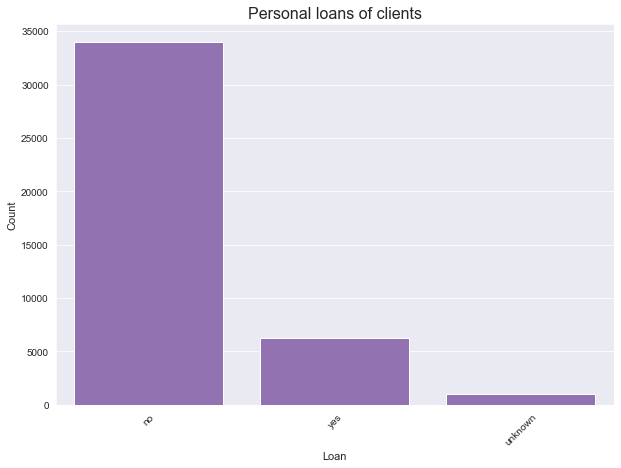

In [129]:
labels = {'title':'Personal loans of clients','xlabel':'Loan','ylabel':'Count'}
create_countplot(data.loan, order = data.loan, color = base_color, **labels);

The majority of clients do not have personal loans. This information is unknown for 990 clients.

In [131]:
# Unique values of contact_type variable
data.contact_type.value_counts()

cellular     26135
telephone    15041
Name: contact_type, dtype: int64

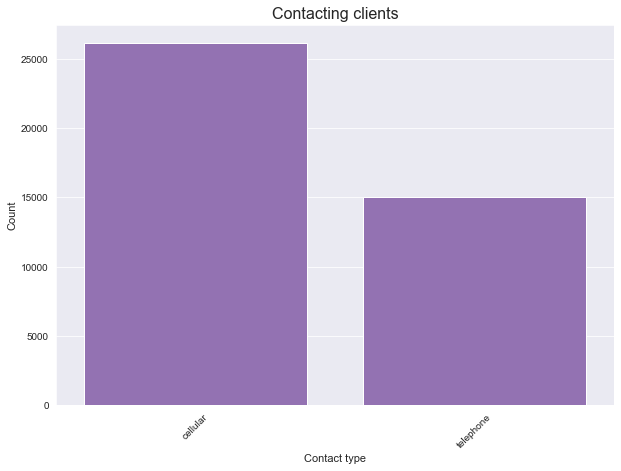

In [132]:
labels = {'title':'Contacting clients','xlabel':'Contact type','ylabel':'Count'}
create_countplot(data.contact_type, order = data.contact_type, color = base_color, **labels);

There are two ways how the bank employees have contacted their clients: cellphone (cellular) or telephone.

In [133]:
# Unique values of previous_campaign_outcome variable
data.previous_campaign_outcome.value_counts()

nonexistent    35551
failure         4252
success         1373
Name: previous_campaign_outcome, dtype: int64

Major part of observation do not provide the information about previous campaign output.

# Exploring numeric variables

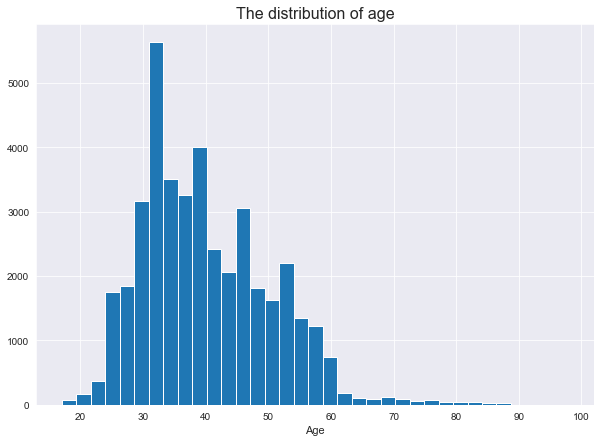

In [134]:
# The distribution of clients age
plt.hist(data.age, bins = 35)
plt.title('The distribution of age')
plt.xlabel('Age');

The histogram above describes the distribution of clients ages. The distribution is rather unimodal with several peaks a little below 30, then at 40 and one peak between 40 and 50. The majority of data points is between 30 and 40. Next there is a very long tail after 60 years.

In [135]:
# Minimum and maximum age
print('The minimum age: {}'.format(data.age.min()))
print('The maximum age: {}'.format(data.age.max()))

The minimum age: 17
The maximum age: 98


In [136]:
data[data['age'] == 17]

,age,job,marital_status,education,default_credit,house_loan,loan,contact_type,month,day_of_week,...,number_of_contacts,days_passed,number_previous_contact,previous_campaign_outcome,emp_variation_rate,CPI,CCI,euribor_rate,no_employees,target
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes


In [137]:
data[data['age'] == 98]

,age,job,marital_status,education,default_credit,house_loan,loan,contact_type,month,day_of_week,...,number_of_contacts,days_passed,number_previous_contact,previous_campaign_outcome,emp_variation_rate,CPI,CCI,euribor_rate,no_employees,target
38452,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,1,2,2,success,-3.4,92.431,-26.9,0.73,5017.5,yes
38455,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.73,5017.5,yes


There are two 17 years old client who have subscribed the term deposit. The oldest client are 98 years old, who also have subscribed the term deposit. At this point I would like to look closer at the higher ages of clients as these can be possible outliers.

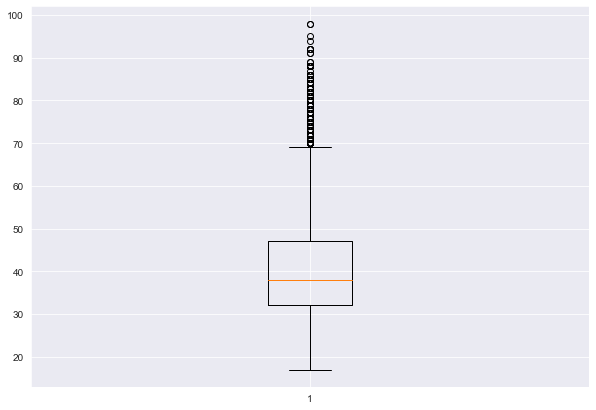

In [138]:
# Visualizing age of clients using boxplot 
plt.boxplot(data.age);

The simplest way how to display possible outliers is using boxplot that shows us how the datapoint are spread out. The positive skewed distribution of datapoints reveal that every datapoint higher then 70 is outlier.


For better interpretation I will convert seconds to minutes in variable contact_duration and look at the distribution of the time.

In [139]:
# Converting seconds to minutes
data.contact_duration = data.contact_duration.apply(lambda x: x / 60)

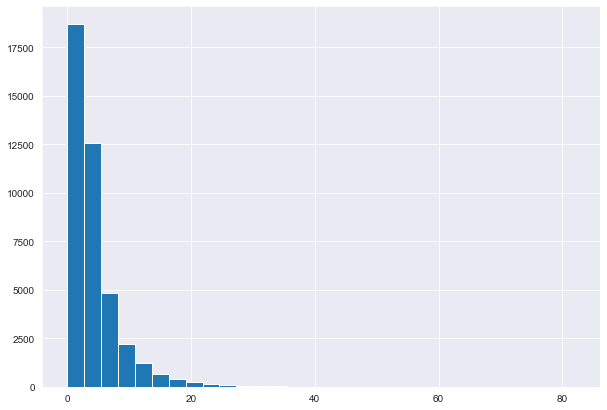

In [140]:
# The duration distribution
plt.hist(data.contact_duration, bins=30);

As we can saw in the summary od descriptive statistics, the longest call with the client was 82 minutes long. The histogram shows us that the most of the calls are below 1 mintue. In this case I would like to look at the call with no duration.

In [142]:
# Observations where is no duration recorded 
data[data['contact_duration'] == 0]

,age,job,marital_status,education,default_credit,house_loan,loan,contact_type,month,day_of_week,...,number_of_contacts,days_passed,number_previous_contact,previous_campaign_outcome,emp_variation_rate,CPI,CCI,euribor_rate,no_employees,target
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


These 4 observations should be removed as the communication has not been performed at all.

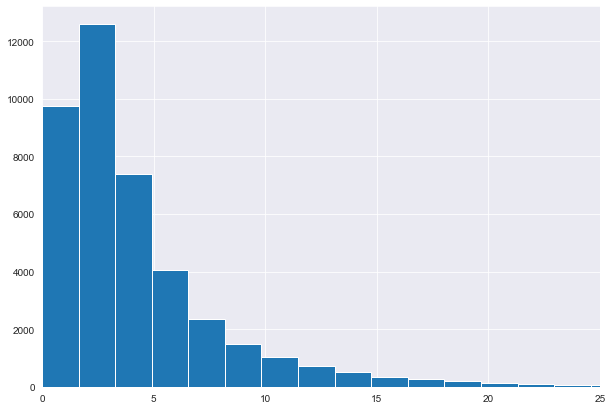

In [143]:
# Setting the axis limit
plt.hist(data.contact_duration, bins = 50)
plt.xlim(0, 25);

The majority of calls were approximately 3 minutes long.